In [2]:
!pip install numpy
!pip install pandas
!pip install openpyxl
!pip install nltk

In [2]:
import re
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import nltk
nltk.download()
from nltk.tokenize import sent_tokenize

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import metrics




showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

In [4]:

file_name = 'Book1_CMM.xlsx'
df = pd.read_excel(file_name)
df
#wb = load_workbook(file_name)
#ws = wb[wb.get_sheet_names()[0]]

,RawReport,ReasonForStudy,Impression,BodyPart,Modality,New-ExamDateTime,Prohance,Eovist Volume,Eovist Rate,"Ascites (1=none, 2=slight, 3=moderate)",...,Abscess/fluid collection/hematoma,Lipoma/AML,Confluent Fibrosis,HCC,Treated Lesions,Regenerative/Dysplastic Nodules,ICC,HCC-ICC,Inderminate Liver Lesions,Metastatic Disease
0,EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...,"Liver lesion, < 1cm, US nondiagnostic",1. Hepatic steatosis with borderline cirrhotic...,ABD,MR,2021-07-17 09:34:00,0,10.0,1.0,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...,with eovist; follow up hepatic lesion,1. Normal hepatic morphology with moderate hep...,ABD,MR,2021-07-17 08:35:00,0,10.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...,Spec Inst: patient with unk primary Ct scan sh...,1. Multiple subcentimeter cysts scattered thro...,ABD,MR,2021-07-16 12:52:00,0,10.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"EXAM: MR Abdomen wo+w contrast, MR [PERSONALNA...","sidebranch IPMN, hepatic lobe lesion","1. Numerous small pancreatic cystic lesion, fe...",ABD,MR,2021-07-13 11:29:00,0,10.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...,"Spec Inst: Liver with Eovist contrast agent, C...",1. Lobulated T2 hyperintense lesions throughou...,ABD,MR,2021-07-13 11:04:00,0,10.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...,Abnormal findings on diagnostic imaging of Liver,1. Mild steatosis with multiple simple appeari...,ABD,MR,2021-01-18 14:07:00,0,10.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495,EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...,Spec Inst: Liver with Eovist contrast agent; h...,Unchanged size and number of multiple (approxi...,ABD,MR,2021-01-18 13:14:00,0,10.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
496,EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...,Liver Lesion,Scattered T2 hyperintense foci which likely re...,ABD,MR,2021-01-18 10:06:00,0,10.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...,"Liver lesion, > 1cm, US nondiagnostic",Cirrhotic liver with probable multifocal HCC. ...,ABD,MR,2021-01-18 08:42:00,0,10.0,1.0,2.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['RawReport', 'ReasonForStudy', 'Impression', 'BodyPart', 'Modality',
       'New-ExamDateTime', 'Prohance', 'Eovist Volume', 'Eovist Rate',
       'Ascites (1=none, 2=slight, 3=moderate)',
       'Reason for Exam (1=initial diagnosis, 2=Follow-up, 3=none)',
       'Liver Related Diagnosis and disease stage', 'Hepatic Cyst', 'Adenoma',
       'FNH', 'Hemangioma', 'Focal fat', 'Fatty Sparing', 'Perfusion anomaly',
       'Abscess/fluid collection/hematoma', 'Lipoma/AML', 'Confluent Fibrosis',
       'HCC', 'Treated Lesions', 'Regenerative/Dysplastic Nodules', 'ICC',
       'HCC-ICC', 'Inderminate Liver Lesions', 'Metastatic Disease'],
      dtype='object')

In [6]:
def parse_report_text(data, col, new_col):
    df1=data.copy()
    df1[new_col]=df1.apply(lambda row: nltk.sent_tokenize(row[col]), axis=1)
    
    return df1



In [25]:
#df_parsed=parse_report_text(df, 'Report', 'Parsed_Report')
#df_parsed

In [7]:


def structured_findings_and_conclusions(text, start_string='ABDOMEN: LIVER:', end_string = 'BILIARY', impression_string='CONCLUSION:'):

    beginning = 0
    end = 0
    impression = 0
    for i in range(len(text)):
        if text[i].startswith('ABDOMEN: LIVER: '):
            beginning = i
        if text[i].startswith('BILIARY'):
            end = i
        if text[i].startswith('CONCLUSION:'):
            impression = i
        
    findings = text[beginning:end]
    impression = text[impression:-1]
    return sub_sample, sub_impression




In [71]:
def find_relevant_text(text, start_string='ABDOMEN: LIVER:', end_string='BILIARY', impression_string='CONCLUSION:', keywords = ['hepatic', 'Hepatic','liver','Liver', 'hepato','Hepato', 'Couinad', 'caudate', 'HCC']):
    
    beginning = 0
    end = 0
    impression = 0
    finding_start=0
    
    findings_text = []
    impression_text = []
    relevant_impression = []
    
    
    for i in range(len(text)):
        if text[i].startswith('CONCLUSION:'):
            impression = i
            #print(f'conclusion {impression}')
        if text[i].startswith('FINDINGS:'):
            finding_start = i
        
        if ('LIVER:') in text[i]:
            beginning = i
            #print(f'beginning {beginning}')
        if (('BILIARY' or 'GALLBLADDER') in text[i]):
            end = i

    findings_text = text[beginning:end]
    if findings_text==[]:
        if (finding_start) and (impression>finding_start):
            findings_text = find_relevant_sentences(text[finding_start:impression], keywords)
        else:
            findings_text = find_relevant_sentences(text[finding_start:-1], keywords)
    if impression:
        impression_text = text[impression:] 
    
    #print(impression_text)
    relevant_impression = find_relevant_sentences(impression_text, keywords)
    total_text=findings_text+relevant_impression

    return findings_text, relevant_impression, total_text
   

In [72]:
def find_relevant_sentences(list, keywords):
    re_list=[]
    #print(f'keywords {keywords}')
    for item in list:
        for word in keywords:
            #print(f'checking {word}')
            if word in item:
                re_list.append(item)
    
    return re_list



In [10]:
def find_lesion_keyword(list, keywords):
    sentence_list=[]
    keyword_list = []
    #print(f'keywords {keywords}')
    for item in list:
        for word in keywords:
            #print(f'checking {word}')
            if word in item:
                sentence_list.append(item)
                keyword_list.append(word)
    return sentence_list, keyword_list




In [101]:
def Process_frame(data):
    df1=data.copy()
    benign_list = ['cyst', 'adenoma', 'Adenoma', 'adenomas', 'abscess','Abscess', 'hemangioma', 'Hemangioma', 'hematoma','Hematoma','fluid collection', 'lipoma','AML', 'angiomyolipoma', 'hamartoma', 'regenerative', 'focal nodular hyperplasia', 'focal fat', 'fatty infiltration','perfusion', 'fatty sparing', 'focal fat sparing', 'focal confluent fibrosis', 'FNH', 'scar', 'LIRADS 2', 'LIRADS 1', 'LR 1', 'LR 2']
    indeterminate_list = ['LIRADS 3','LR 3', 'indeterminate', 'indeterminant', 'too small to characterize', 'versus', 'differential', 'tumor', 'dysplastic']
    malignant_list = ['cancer', 'carcinoma', 'HCC', 'hcc', 'cholangiocarcinoma', 'metastasis', 'metastatic', 'metastases', 'LIRADS 4', 'LIRADS 5', 'LIRADS M', 'LIRADS TIV', 'tumor in vein']
    primary_list = ['breast', 'lung', 'prostate', 'pancreatic', 'renal cell', 'RCC', 'Neuroendocrine', 'neuroendocrine', 'Carcinoid', 'carcinoid', 'lymphoma']
    treatment_list = ['treated', 'Treated', 'TREATED', 'LR-TR', 'LR-TR Non-viable', 'Non-viable', 'Nonviable', 'Viable', 'viable', 'LR-TR Viable', 'LR-TR Equivocal', 'LR-TR equivocal', 'ablation','Ablation', 'cavity', 'resection','Resection', 'hepatectomy', 'embolization', 'Y-90', 'chemo-embolization', 'external beam', 'radiation', 'EBR', 'XRT', 'segmentectomy', 'Segmentectomy']
    relevant_list = ['hepatic','Hepatic', 'liver','Liver', 'hepato','Hepato', 'Couinad', 'caudate', 'HCC']
    negation_terms = ['Negative', 'negative', 'No evidence', 'no evidence', 'No metastases', 'No definite', 'no definite']
    column_to_check = 'RawReport'
    column_to_check2 = 'Impression'
    parsed_column = 'Parsed'
    
    relevant_column = 'Relevant Sentences'
    benign_column = 'Benign Sentences'
    benign_keys_column = 'Benign Diagnoses'
    indeterminate_column = 'Indeterminate Sentences'
    indeterminate_keys_column = 'Indeterminate terms'
    malignant_column = 'Malignant Sentences'
    malignant_keys_column = 'Malignant Diagnoses'
    treatment_column = 'Treatment Sentences'
    treatment_keys_column = 'Treatment Terms'
    corrected_malignant_negation = 'Negation Malignant Sentences'
    corrected_malignant_remainder = 'Corrected Malignant Sentences'
    corrected_malignant_keys_column = 'Corrected Malignant Diagnoses'
    
    benign_bool_column = 'Benign'
    malignant_bool_column = 'Malignant'
    indeterminate_bool_column = 'Indeterminate'
    
    treatment_bool_column = 'Treatment'
    corrected_malignant_bool_column = 'Corrected Malignant'
    
    df1[parsed_column] = df1.apply(lambda row: nltk.sent_tokenize(row[column_to_check]), axis=1)
    
    df1[relevant_column] = df1.apply(lambda row: find_relevant_text(row[parsed_column], relevant_list)[2], axis=1)
    
    df1[benign_column] = df1.apply(lambda row: find_lesion_keyword(row[relevant_column], benign_list)[0], axis=1)
    df1[benign_keys_column] = df1.apply(lambda row: find_lesion_keyword(row[relevant_column], benign_list)[1], axis=1)
    df1[malignant_column] = df1.apply(lambda row: find_lesion_keyword(row[relevant_column], malignant_list)[0], axis=1)
    df1[malignant_keys_column] = df1.apply(lambda row: find_lesion_keyword(row[relevant_column], malignant_list)[1], axis=1)
    df1[indeterminate_column] = df1.apply(lambda row: find_lesion_keyword(row[relevant_column], indeterminate_list)[0], axis=1)
    df1[indeterminate_keys_column] = df1.apply(lambda row: find_lesion_keyword(row[relevant_column], indeterminate_list)[1], axis=1)
    df1[treatment_column] = df1.apply(lambda row: find_lesion_keyword(row[relevant_column], treatment_list)[0], axis=1)
    df1[treatment_keys_column] = df1.apply(lambda row: find_lesion_keyword(row[relevant_column], treatment_list)[1], axis=1)

    df1[benign_bool_column] = df1.apply(lambda row: int(bool(row[benign_column])), axis=1)
    df1[malignant_bool_column] = df1.apply(lambda row: int(bool(row[malignant_column])), axis=1)
    df1[treatment_bool_column] = df1.apply(lambda row: int(bool(row[treatment_column])), axis=1)
    
    df1[corrected_malignant_negation] = df1.apply(lambda row: find_lesion_keyword(row[malignant_column], negation_terms)[0], axis=1)
    #df1[corrected_malignant_remainder] = df1[df1[malignant_column],df1[corrected_malignant_negation]].apply(lambda x: [i for i in x[0] if i not in x[1]], axis=1)
    df1[corrected_malignant_remainder] = df1[['Malignant Sentences','Negation Malignant Sentences']].apply(lambda x: [i for i in x[0] if i not in x[1]], axis=1)
    #df1['Primary (extra-hepatic)'] = df1[['Malignant Diagnoses'].apply(lambda row: [i for i in row if ])
    df1[corrected_malignant_bool_column] = df1.apply(lambda row: int(bool(row[corrected_malignant_remainder] or row[treatment_bool_column])), axis=1)

    #columns for each type of lesion
    df1['Auto_Cyst'] = df1.apply(lambda row: int(bool(find_lesion_keyword(row[relevant_column], ['cyst','cysts'])[1])), axis=1)
    df1['Auto_FNH'] = df1.apply(lambda row: int(bool(find_lesion_keyword(row[relevant_column], ['FNH','focal nodular hyperplasia'])[1])), axis=1)
    df1['Auto_Adenoma'] = df1.apply(lambda row: int(bool(find_lesion_keyword(row[relevant_column], ['adenoma','Adenoma'])[1])), axis=1)
    df1['Auto_Abscess/Hematoma/Collection'] = df1.apply(lambda row: int(bool(find_lesion_keyword(row[relevant_column], ['abscess','Abscess', 'hematoma', 'Hematoma', 'fluid collection'])[1])), axis=1)
    df1['Auto_Hemangioma'] = df1.apply(lambda row: int(bool(find_lesion_keyword(row[relevant_column], ['hemangioma','Hemangioma'])[1])), axis=1)
    df1['Auto_Lipoma_aml'] = df1.apply(lambda row: int(bool(find_lesion_keyword(row[relevant_column], ['lipoma','Lipoma', 'AML', 'angiomyolipoma'])[1])), axis=1)
    df1['Auto_Focal_fat'] = df1.apply(lambda row: int(bool(find_lesion_keyword(row[relevant_column], ['focal fat', 'fatty infiltration'])[1])), axis=1)
    df1['Auto_Fatty_sparing'] = df1.apply(lambda row: int(bool(find_lesion_keyword(row[relevant_column], ['fatty sparing', 'focal fat sparing'])[1])), axis=1)
    df1['Auto_Perfusion_anomaly'] = df1.apply(lambda row: int(bool(find_lesion_keyword(row[relevant_column], ['perfusion'])[1])), axis=1)
    df1['Auto_HCC'] = df1.apply(lambda row: int(bool(find_lesion_keyword(row['Corrected Malignant Sentences'], ['HCC', 'hepatocellular', 'LI-RADS 4', 'LI-RADS 5', 'LI-RADS TR'])[1])), axis=1)
    df1['Auto_mets'] = df1.apply(lambda row: int(bool(find_lesion_keyword(row['Corrected Malignant Sentences'], ['metastas', 'metastatses', 'metastasis', 'metastatic'])[1])), axis=1)
    return df1




In [23]:
''' the columns in brians spreadsheet
Index(['RawReport', 'ReasonForStudy', 'Impression', 'BodyPart', 'Modality',
       'New-ExamDateTime', 'Prohance', 'Eovist Volume', 'Eovist Rate',
       'Ascites (1=none, 2=slight, 3=moderate)',
       'Reason for Exam (1=initial diagnosis, 2=Follow-up, 3=none)',
       'Liver Related Diagnosis and disease stage', 'Hepatic Cyst', 'Adenoma',
       'FNH', 'Hemangioma', 'Focal fat', 'Fatty Sparing', 'Perfusion anomaly',
       'Abscess/fluid collection/hematoma', 'Lipoma/AML', 'Confluent Fibrosis',
       'HCC', 'Treated Lesions', 'Regenerative/Dysplastic Nodules', 'ICC',
       'HCC-ICC', 'Inderminate Liver Lesions', 'Metastatic Disease'],
      dtype='object')
'''

" the columns in brians spreadsheet\nIndex(['RawReport', 'ReasonForStudy', 'Impression', 'BodyPart', 'Modality',\n       'New-ExamDateTime', 'Prohance', 'Eovist Volume', 'Eovist Rate',\n       'Ascites (1=none, 2=slight, 3=moderate)',\n       'Reason for Exam (1=initial diagnosis, 2=Follow-up, 3=none)',\n       'Liver Related Diagnosis and disease stage', 'Hepatic Cyst', 'Adenoma',\n       'FNH', 'Hemangioma', 'Focal fat', 'Fatty Sparing', 'Perfusion anomaly',\n       'Abscess/fluid collection/hematoma', 'Lipoma/AML', 'Confluent Fibrosis',\n       'HCC', 'Treated Lesions', 'Regenerative/Dysplastic Nodules', 'ICC',\n       'HCC-ICC', 'Inderminate Liver Lesions', 'Metastatic Disease'],\n      dtype='object')\n"

In [102]:
df20=Process_frame(df)

In [83]:
find_relevant_text(df20.Parsed[239], 'liver')[2]

['ABDOMEN: LIVER: There is persistent diffuse liver steatosis.',
 'The homogeneous T2 hyperintense hypervascular mass in segment [PERSONALNAME] slightly extends into segment VIII (image 34 series 1002).',
 'The mass is hypointense relative to the adjacent liver on the hepatobiliary phase.',
 'CONCLUSION: The hypervascular mass in segment IVA/VIII of the liver lacks contrast retention on the delayed hepatobiliary phase and is most consistent with an adenoma.',
 'CONCLUSION: The hypervascular mass in segment IVA/VIII of the liver lacks contrast retention on the delayed hepatobiliary phase and is most consistent with an adenoma.']

In [23]:
#dtest['ColumnC']= dtest['ColumnA'].apply(lambda x: [item for item in x if item not in dtest['ColumnB']])
#dtest

#matches = dtest.ColumnA.apply(lambda x: [item for item in dtest.ColumnB if item not in dtest.ColumnA])
#dtest['ColumnC']
#dtest['ColumnC'] = dtest.ColumnA[matches]
#dtest['ColumnC'] = dtest[['ColumnA', 'ColumnB']].apply(lambda x: [i for i in x[0] if i not in x[1]], axis=1)
#dtest
#dtest['ColumnC'] = dtest.apply(lambda row: all(i not in row.ColumnB for i in row.ColumnA), axis=1)
#dtest

In [24]:
df20['Benign Sentences'][1]

['This lesion does not have any correlated significant abnormality in the hepatobiliary phase and other sequences, most likely represents perfusional abnormality.']

In [25]:
df20['Malignant'].value_counts()

0    381
1    118
Name: Malignant, dtype: int64

In [26]:
for i in range(len(df20.Parsed)):
    print(i, find_relevant_text(df20.Parsed[i])[0])
    

0 ['ABDOMEN: LIVER: The liver is moderately steatotic with borderline cirrhotic morphology.', 'T2 hyperintense/T1 isointense, arterially enhancing lesion in segment II measures approximately 2.9 x 3.1 cm (series 1101, image 89) and demonstrates progressive washout and capsular enhancement on delayed imaging.', 'The lesion restricts diffusion and does not retain contrast on hepatobiliary phase.', 'T2/T1 heterogeneous, heterogeneously enhancing lesion in segment [PERSONALNAME] measures 1.9 x 3.0 cm (series 1101, image 24) demonstrates heterogeneous enhancement on portal venous and delayed imaging.', 'Diffusion restriction and does not retain contrast on hepatobiliary phase.', 'The lesion shows intracellular fat in out of phase sequence.', '[PERSONALNAME] T2 heterogeneous/T1 hypointense heterogeneously enhancing lesion in hepatic [PERSONALNAME] measures 3.5 x 3.8 cm ( series 1101, image 59) and demonstrates washout on portal venous and delayed phases.', 'There is no contrast retention on 

In [27]:
find_relevant_text(df20.Parsed[11])

(['ABDOMEN: LIVER: Partial left and right hepatectomy site noted.',
  'There is diffuse hepatic steatosis.',
  'There is redemonstration of numerous mildly T2 hyperintense lesions throughout the liver the largest measuring 1.7 cm in the medial right hepatic lobe segment 6 (series 501 image 22) adjacent to the IVC.',
  'The larger lesions demonstrate arterial phase enhancement without washout on portal venous phase.',
  'There is subtly decreased enhancement on the hepatobiliary phase.',
  'The smaller lesions also demonstrate subtle decrease in contrast retention on hepatobiliary phase.'],
 ['Stable appearance of multiple hepatic lesions as described, consistent with hepatic adenomas.',
  'No new suspicious hepatic lesion identified.',
  'Diffuse hepatic steatosis.'],
 ['ABDOMEN: LIVER: Partial left and right hepatectomy site noted.',
  'There is diffuse hepatic steatosis.',
  'There is redemonstration of numerous mildly T2 hyperintense lesions throughout the liver the largest measurin

In [84]:
df20

,RawReport,ReasonForStudy,Impression,BodyPart,Modality,New-ExamDateTime,Prohance,Eovist Volume,Eovist Rate,"Ascites (1=none, 2=slight, 3=moderate)",...,Auto_FNH,Auto_Adenoma,Auto_Abscess/Hematoma/Collection,Auto_Hemangioma,Auto_Lipoma_aml,Auto_Focal_fat,Auto_Fatty_sparing,Auto_Perfusion_anomaly,Auto_HCC,Auto_mets
0,"EXAM: MR Abdomen wo+w contrast CLINICAL INFORMATION: 35-year-old female with indeterminant subcentimeter right hepatic lobe lesion seen on recent abdominal ultrasound. COMPARISON: Abdominal ultrasound [DATE] TECHNIQUE: MR Abdomen wo+w contrast Patient weight: 190 lbs. IV contrast: Eovist, 10 ml, per protocol. IV contrast injection rate: 1 ml per sec. FINDINGS: STRUCTURED REPORT: MR abdomen LOWER CHEST: LUNG BASES / PLEURA: No significant abnormality. DISTAL ESOPHAGUS: No significant abnormality. HEART / VESSELS: No significant abnormality. ABDOMEN: LIVER: The liver is moderately steatotic with borderline cirrhotic morphology. T2 hyperintense/T1 isointense, arterially enhancing lesion in segment II measures approximately 2.9 x 3.1 cm (series 1101, image 89) and demonstrates progressive washout and capsular enhancement on delayed imaging. The lesion restricts diffusion and does not retain contrast on hepatobiliary phase. T2/T1 heterogeneous, heterogeneously enhancing lesion in segment [PERSONALNAME] measures 1.9 x 3.0 cm (series 1101, image 24) demonstrates heterogeneous enhancement on portal venous and delayed imaging. Diffusion restriction and does not retain contrast on hepatobiliary phase. The lesion shows intracellular fat in out of phase sequence. [PERSONALNAME] T2 heterogeneous/T1 hypointense heterogeneously enhancing lesion in hepatic [PERSONALNAME] measures 3.5 x 3.8 cm ( series 1101, image 59) and demonstrates washout on portal venous and delayed phases. There is no contrast retention on hepatobiliary phase. There numerous additional smaller T2 hyperintense, T1 isointense arterially hyperenhancing lesions scattered throughout the right hepatic lobe. The largest is located in the subcapsular, lateral right hepatic lobe measures 1.3 x 1.0 cm (arterial series 701, image 183). The lesions show restricted diffusion. BILIARY TRACT: Nondilated. GALLBLADDER: [PERSONALNAME]. PANCREAS: [PERSONALNAME]. SPLEEN: Normal. ADRENALS: Normal. KIDNEYS: Normal. LYMPH NODES: None enlarged. STOMACH / SMALL BOWEL: No abnormality. COLON: No abnormality. PERITONEUM / MESENTERY: Normal. RETROPERITONEUM: Normal. VESSELS: No significant abnormality. BODY WALL: No significant abnormality. MUSCULOSKELETAL: No significant abnormality. CONCLUSION: 1. Hepatic steatosis with borderline cirrhotic morphology. Arterial hyperenhancing lesion measures 3.1 x 2.9 cm with delayed washout and capsular enhancement in segment two, highly concerning for HCC ([ALPHANUMERICID]). 2. Arterial hyperenhancing lesion measures 1.9 x 3.0 cm with heterogeneous washout and microscopic fat in segment six, highly concerning for well differentiated HCC versus hepatic adenoma. 3. Arterial hyperenhancing lesion measures 3.8 x 3.5 cm with heterogeneous washout and without retention of the contrast in the hepatobiliary phase, concerning for HCC ([ALPHANUMERICID]). 4. Additional multiple arterial hyperenhancing lesions measuring up to 1.2 cm without washout or contrast retention in the hepatobiliary phase in the right lobe and these lesions show restricted diffusion, [ALPHANUMERICID]. As the attending physician, I have personally reviewed the images, interpreted and/or supervised the study or procedure, and agree with the wording of the above report.","Liver lesion, < 1cm, US nondiagnostic","1. Hepatic steatosis with borderline cirrhotic morphology. Arterial hyperenhancing lesion measures 3.1 x 2.9 cm with delayed washout and capsular enhancement in segment two, highly concerning for HCC ([ALPHANUMERICID]). 2. Arterial hyperenhancing lesion measures 1.9 x 3.0 cm with heterogeneous washout and microscopic fat in segment six, highly concerning for well differentiated HCC v

In [28]:
df_cyst_check = df20[['Hepatic Cyst','Auto_Cyst']].fillna(0).astype(int)
df_cyst_check


,Hepatic Cyst,Auto_Cyst
0,0,0
1,0,0
2,1,1
3,1,1
4,0,1
...,...,...
494,1,1
495,0,0
496,1,1
497,0,0


In [29]:
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn import metrics


def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Lesion Absent', 'Lesion Present'], yticklabels=['Lesion Absent', 'Lesion Present'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       343
           1       0.92      0.98      0.95       156

    accuracy                           0.97       499
   macro avg       0.96      0.97      0.96       499
weighted avg       0.97      0.97      0.97       499



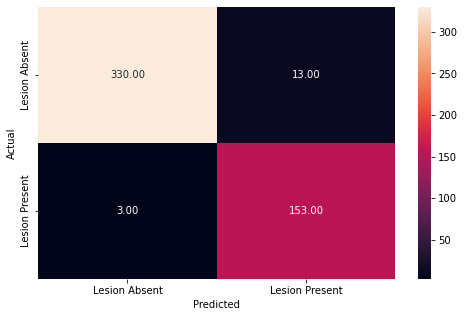

In [30]:
metrics_score(df_cyst_check['Hepatic Cyst'], df_cyst_check['Auto_Cyst'])

In [31]:
incorrect_list = (df_cyst_check['Hepatic Cyst']!=df_cyst_check['Auto_Cyst'])
incorrect_list.value_counts()

False    483
True      16
dtype: int64

In [32]:
df_cyst_not_correct = df20['RawReport'].loc[(df_cyst_check['Hepatic Cyst']!=df_cyst_check['Auto_Cyst'])]
df_cyst_not_correct

4      EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...
18     EXAM: MR [PERSONALNAME] MRCP, MR Abdomen wo+w ...
36     EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...
117    EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...
143    EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...
173    EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...
177    EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...
184    EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...
205    EXAM: MR Abdomen wo+w contrast, MR [PERSONALNA...
214    EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...
261    EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...
287    EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...
298    EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...
346    EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...
472    EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...
498    EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...
Name: RawReport, dtype: object

In [33]:
df20[['RawReport','Hepatic Cyst', 'Auto_Cyst']].loc[472]

RawReport       EXAM: MR Abdomen wo+w contrast CLINICAL INFORM...
Hepatic Cyst                                                  NaN
Auto_Cyst                                                       1
Name: 472, dtype: object

In [104]:
df20['Relevant Sentences'][498]

['ABDOMEN: LIVER: Cirrhotic.',
 'No steatosis.',
 'There are several cysts in the liver.',
 'LIVER LESIONS: No enhancing liver lesion.',
 'LIVER VASCULATURE AND COLLATERALS: - Hepatic artery patency and anatomy: Patent with conventional anatomy.',
 '- Portal venous system: Main portal vein and intrahepatic portal venous system is diminutive in size.',
 '- Hepatic veins: Patent right, middle and left hepatic veins.',
 '- Esophageal varices: Large (>5 mm diameter).',
 '- Other varices or collaterals: There are large proximal gastric varices, and small omental varices.',
 'Cirrhotic liver with diminutive size of the main portal vein and intrahepatic portal veins.',
 'Cirrhotic liver with diminutive size of the main portal vein and intrahepatic portal veins.',
 'No enhancing liver mass.']

In [34]:
df20.columns

Index(['RawReport', 'ReasonForStudy', 'Impression', 'BodyPart', 'Modality',
       'New-ExamDateTime', 'Prohance', 'Eovist Volume', 'Eovist Rate',
       'Ascites (1=none, 2=slight, 3=moderate)',
       'Reason for Exam (1=initial diagnosis, 2=Follow-up, 3=none)',
       'Liver Related Diagnosis and disease stage', 'Hepatic Cyst', 'Adenoma',
       'FNH', 'Hemangioma', 'Focal fat', 'Fatty Sparing', 'Perfusion anomaly',
       'Abscess/fluid collection/hematoma', 'Lipoma/AML', 'Confluent Fibrosis',
       'HCC', 'Treated Lesions', 'Regenerative/Dysplastic Nodules', 'ICC',
       'HCC-ICC', 'Inderminate Liver Lesions', 'Metastatic Disease', 'Parsed',
       'Relevant Sentences', 'Benign Sentences', 'Benign Diagnoses',
       'Malignant Sentences', 'Malignant Diagnoses', 'Indeterminate Sentences',
       'Indeterminate terms', 'Treatment Sentences', 'Treatment Terms',
       'Benign', 'Malignant', 'Treatment', 'Negation Malignant Sentences',
       'Corrected Malignant Sentences', 'Correc

In [103]:

#make pairs for comparison
GT_columns = ['Hepatic Cyst', 'Hemangioma', 'Adenoma', 'FNH', 'Lipoma/AML', 'Abscess/fluid collection/hematoma', 'Perfusion anomaly', 'Fatty Sparing', 'HCC', 'Metastatic Disease' ]
auto_columns = ['Auto_Cyst', 'Auto_Hemangioma','Auto_Adenoma', 'Auto_FNH', 'Auto_Lipoma_aml', 'Auto_Abscess/Hematoma/Collection', 'Auto_Perfusion_anomaly', 'Auto_Fatty_sparing', 'Auto_HCC', 'Auto_mets']
comparison_cols = zip(GT_columns, auto_columns)
comparison_cols = list(comparison_cols)
comparison_cols

[('Hepatic Cyst', 'Auto_Cyst'),
 ('Hemangioma', 'Auto_Hemangioma'),
 ('Adenoma', 'Auto_Adenoma'),
 ('FNH', 'Auto_FNH'),
 ('Lipoma/AML', 'Auto_Lipoma_aml'),
 ('Abscess/fluid collection/hematoma', 'Auto_Abscess/Hematoma/Collection'),
 ('Perfusion anomaly', 'Auto_Perfusion_anomaly'),
 ('Fatty Sparing', 'Auto_Fatty_sparing'),
 ('HCC', 'Auto_HCC'),
 ('Metastatic Disease', 'Auto_mets')]

Hepatic Cyst Auto_Cyst
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       343
         1.0       0.92      0.98      0.95       156

    accuracy                           0.97       499
   macro avg       0.96      0.97      0.96       499
weighted avg       0.97      0.97      0.97       499



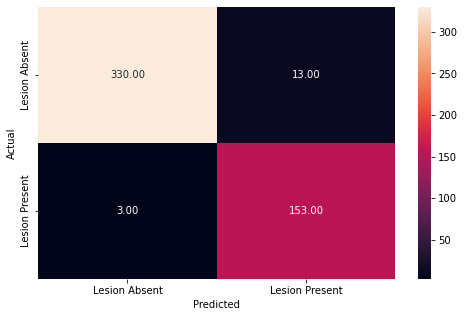

Hemangioma Auto_Hemangioma
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       412
         1.0       0.99      0.90      0.94        87

    accuracy                           0.98       499
   macro avg       0.98      0.95      0.96       499
weighted avg       0.98      0.98      0.98       499



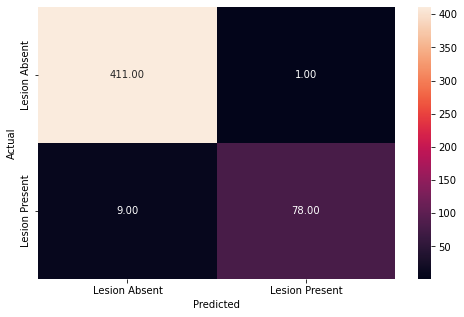

Adenoma Auto_Adenoma
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       439
         1.0       0.93      0.85      0.89        60

    accuracy                           0.97       499
   macro avg       0.95      0.92      0.94       499
weighted avg       0.97      0.97      0.97       499



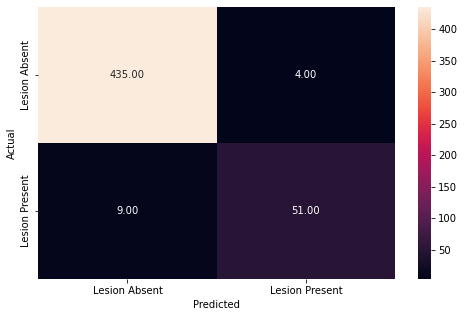

FNH Auto_FNH
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       436
         1.0       0.96      0.83      0.89        63

    accuracy                           0.97       499
   macro avg       0.97      0.91      0.94       499
weighted avg       0.97      0.97      0.97       499



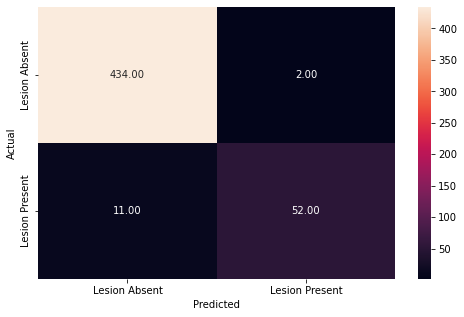

Lipoma/AML Auto_Lipoma_aml
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       496
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00       499
   macro avg       1.00      1.00      1.00       499
weighted avg       1.00      1.00      1.00       499



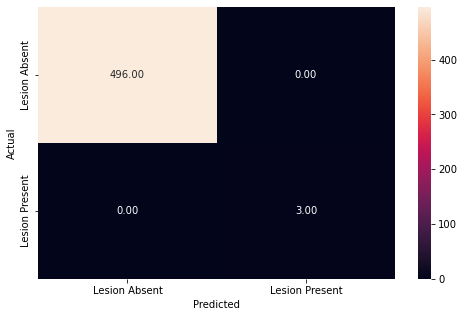

Abscess/fluid collection/hematoma Auto_Abscess/Hematoma/Collection
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       491
         1.0       0.40      0.75      0.52         8

    accuracy                           0.98       499
   macro avg       0.70      0.87      0.76       499
weighted avg       0.99      0.98      0.98       499



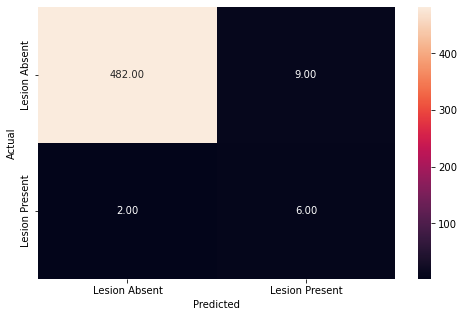

Perfusion anomaly Auto_Perfusion_anomaly
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       457
         1.0       0.97      0.76      0.85        42

    accuracy                           0.98       499
   macro avg       0.97      0.88      0.92       499
weighted avg       0.98      0.98      0.98       499



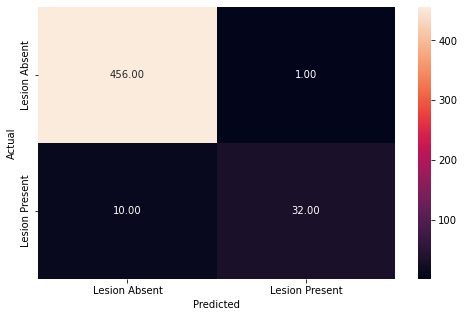

Fatty Sparing Auto_Fatty_sparing
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       495
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00       499
   macro avg       1.00      1.00      1.00       499
weighted avg       1.00      1.00      1.00       499



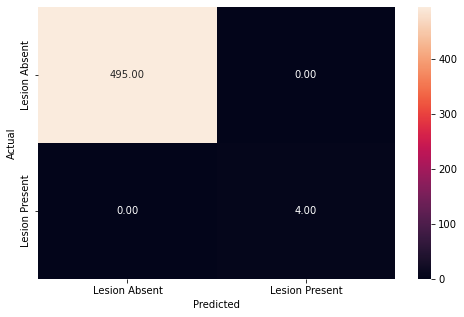

HCC Auto_HCC
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       481
         1.0       0.52      0.67      0.59        18

    accuracy                           0.97       499
   macro avg       0.75      0.82      0.78       499
weighted avg       0.97      0.97      0.97       499



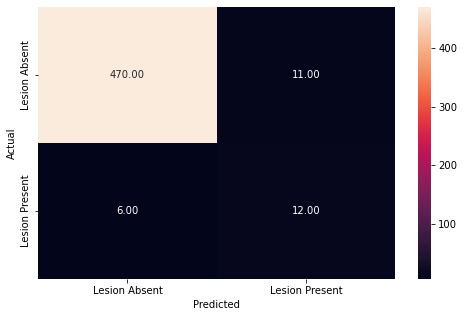

Metastatic Disease Auto_mets
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       419
         1.0       0.70      0.76      0.73        80

    accuracy                           0.91       499
   macro avg       0.83      0.85      0.84       499
weighted avg       0.91      0.91      0.91       499



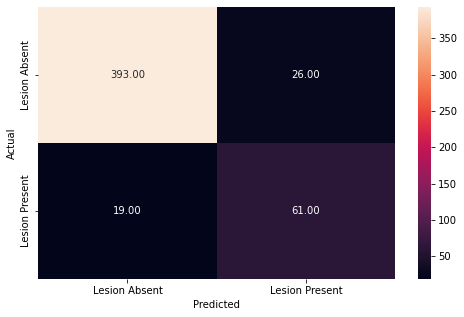

In [113]:
comparison_df = df20.copy()
comparison_df = comparison_df.fillna(0)
comparison_df   

for (col1, col2) in comparison_cols:
    print(col1, col2)
    metrics_score(comparison_df[col1], comparison_df[col2])



In [64]:
pd.set_option('display.max_colwidth', None)

In [112]:
incorrect_temp_df = comparison_df.copy()

incorrect_temp_df= comparison_df.loc[comparison_df[comparison_cols[0]]!=comparison_df[comparison_cols[1]]][['RawReport', 'Benign Sentences', 'Malignant Sentences', col1, col2]]
    
    incorrect_df=incorrect_df.merge(incorrect_temp_df)
incorrect_df    

Hepatic Cyst Auto_Cyst


TypeError: unhashable type: 'list'

In [67]:
comparison_df['Relevant Sentences'][239]

['ABDOMEN: LIVER: There is persistent diffuse liver steatosis.',
 'The homogeneous T2 hyperintense hypervascular mass in segment [PERSONALNAME] slightly extends into segment VIII (image 34 series 1002).',
 'The mass is hypointense relative to the adjacent liver on the hepatobiliary phase.']

In [70]:
find_relevant_text(df20.Parsed[239], 'liver')

(['ABDOMEN: LIVER: There is persistent diffuse liver steatosis.',
  'The homogeneous T2 hyperintense hypervascular mass in segment [PERSONALNAME] slightly extends into segment VIII (image 34 series 1002).',
  'The mass is hypointense relative to the adjacent liver on the hepatobiliary phase.'],
 [],
 ['ABDOMEN: LIVER: There is persistent diffuse liver steatosis.',
  'The homogeneous T2 hyperintense hypervascular mass in segment [PERSONALNAME] slightly extends into segment VIII (image 34 series 1002).',
  'The mass is hypointense relative to the adjacent liver on the hepatobiliary phase.'])

In [99]:
df20.to_excel('export of ba data_12_06.xlsx')